In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [44]:
df_merged=pd.read_csv('merged.csv')
df_merged.head()

,Unnamed: 0,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,...,10I,10J,ACTION,CRITICAL FLAG,GRADE,DBA,CUISINE DESCRIPTION,is_chain,Community Board,BORO
0,0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,1,A,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
1,1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,0,A,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
2,2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,1,B,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
3,3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,3,C,WENDY'S,Hamburgers,1,309.0,Brooklyn
4,4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,1,A,WENDY'S,Hamburgers,1,309.0,Brooklyn


In [45]:
df_merged.drop(columns='Unnamed: 0',inplace=True)
df_merged['DATE']=pd.to_datetime(df_merged['DATE'])
df_merged.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10I,10J,ACTION,CRITICAL FLAG,GRADE,DBA,CUISINE DESCRIPTION,is_chain,Community Board,BORO
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,1,A,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,0,A,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,1,B,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,3,C,WENDY'S,Hamburgers,1,309.0,Brooklyn
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Violations were cited in the following area(s).,1,A,WENDY'S,Hamburgers,1,309.0,Brooklyn


In [8]:
df_merged.groupby('CUISINE DESCRIPTION')['SCORE'].mean().sort_values().head()

CUISINE DESCRIPTION
Hotdogs                7.968750
Nuts/Confectionary     8.125000
Hotdogs/Pretzels       8.964912
Basque                10.000000
Donuts                10.479868
Name: SCORE, dtype: float64

In [9]:
df_merged.groupby('CUISINE DESCRIPTION')['SCORE'].mean().describe()

count    84.000000
mean     16.123009
std       3.552806
min       7.968750
25%      14.100746
50%      16.249314
75%      18.062420
max      27.750000
Name: SCORE, dtype: float64

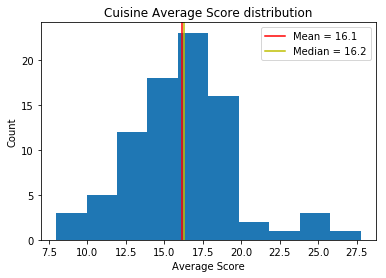

In [16]:
cuis_avg=df_merged.groupby('CUISINE DESCRIPTION')['SCORE'].mean().values
plt.hist(cuis_avg)
plt.axvline(x=np.mean(cuis_avg),color='r',label=f'Mean = {round(np.mean(cuis_avg),1)}')
plt.axvline(x=np.median(cuis_avg),color='y',label=f'Median = {round(np.median(cuis_avg),1)}')
plt.legend()
plt.title('Cuisine Average Score distribution')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

In [20]:
df_merged['CUISINE DESCRIPTION'].value_counts().head(9)

American                                                            15473
Chinese                                                              6181
Café/Coffee/Tea                                                      4013
Pizza                                                                3045
Italian                                                              2645
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     2517
Mexican                                                              2409
Bakery                                                               2160
Japanese                                                             2102
Name: CUISINE DESCRIPTION, dtype: int64

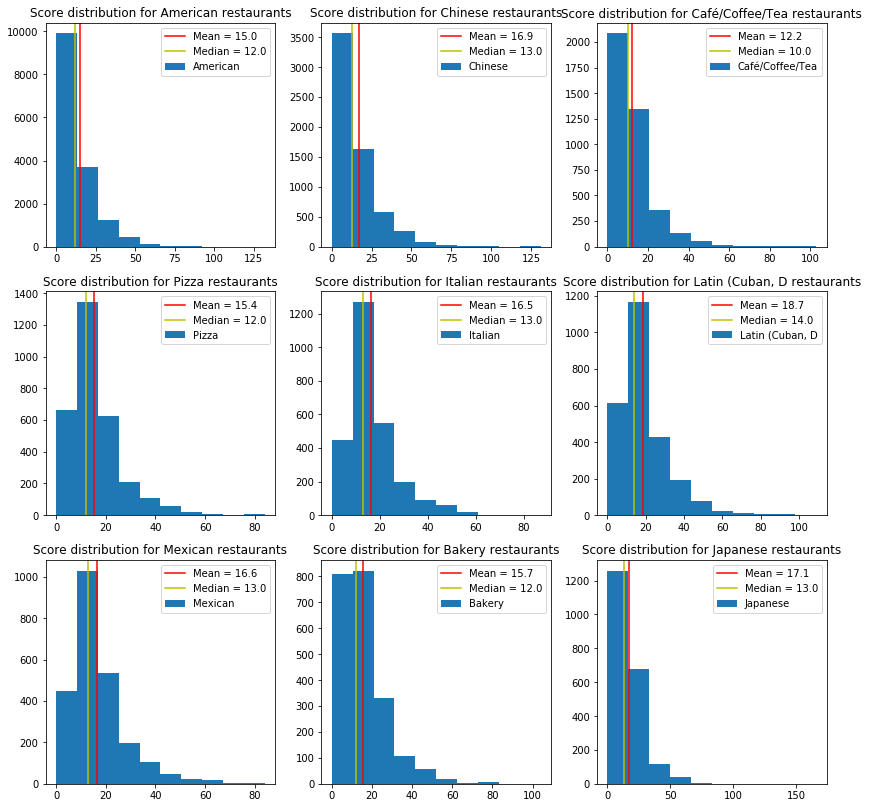

In [22]:
nine_most_pop=df_merged['CUISINE DESCRIPTION'].value_counts().head(9).index
plt.figure(figsize=(14,14))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    score=df_merged.loc[df_merged['CUISINE DESCRIPTION']==nine_most_pop[i]]['SCORE']
    plt.hist(score,label=nine_most_pop[i][:15])
    plt.axvline(x=np.mean(score),color='r',label=f'Mean = {round(np.mean(score),1)}',)
    plt.axvline(x=np.median(score),color='y',label=f'Median = {round(np.median(score),1)}')
    plt.title(f'Score distribution for {nine_most_pop[i][:15]} restaurants')
    plt.legend()

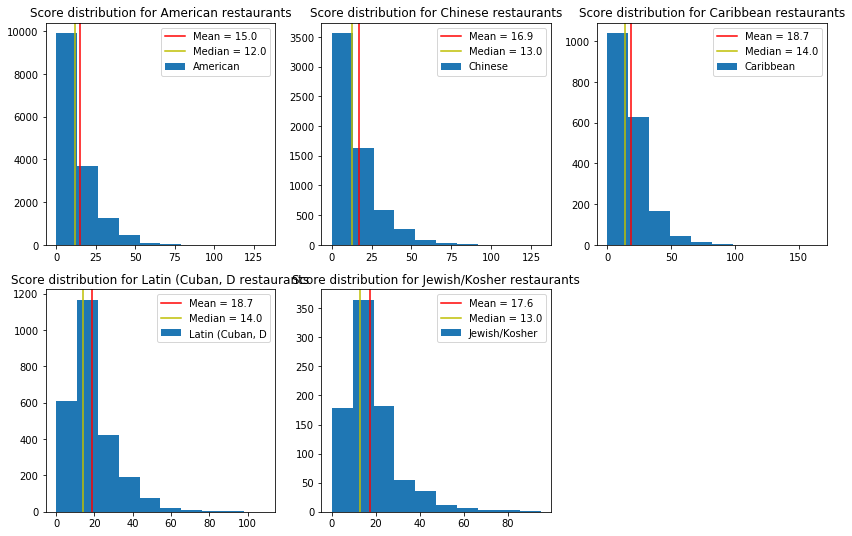

In [25]:
five_pop=['American', 'Chinese', 'Caribbean','Latin (Cuban, Dominican, Puerto Rican, South & Central American)','Jewish/Kosher']
plt.figure(figsize=(14,9))
for i in range(0,5):
    plt.subplot(2,3,i+1)
    score=df_merged.loc[df_merged['CUISINE DESCRIPTION']==five_pop[i]]['SCORE']
    plt.hist(score,label=five_pop[i][:15])
    plt.axvline(x=np.mean(score),color='r',label=f'Mean = {round(np.mean(score),1)}',)
    plt.axvline(x=np.median(score),color='y',label=f'Median = {round(np.median(score),1)}')
    plt.title(f'Score distribution for {five_pop[i][:15]} restaurants')
    plt.legend()

In [34]:
stats=df_merged.loc[df_merged['is_chain']==0]['SCORE'].describe().index
not_chain=df_merged.loc[df_merged['is_chain']==0]['SCORE'].describe().values
is_chain=df_merged.loc[df_merged['is_chain']==1]['SCORE'].describe().values
df_chain=pd.DataFrame()
df_chain['stats']=stats
df_chain['NOT_chain']=not_chain
df_chain['IS_chain']=is_chain
df_chain.set_index('stats',inplace=True)
df_chain

,NOT_chain,IS_chain
stats,,
count,49135.000000,16797.000000
mean,16.435637,13.637971
std,11.610397,10.414274
min,0.000000,0.000000
25%,9.000000,7.000000
50%,12.000000,11.000000
75%,21.000000,17.000000
max,166.000000,137.000000


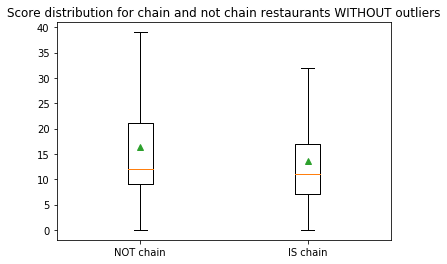

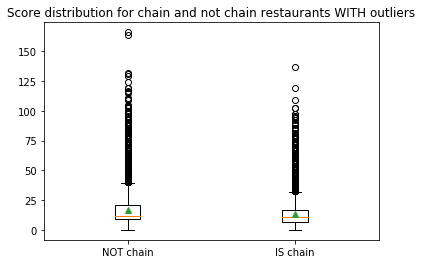

In [29]:
plt.boxplot([df_merged.loc[df_merged['is_chain']==0]['SCORE'],df_merged.loc[df_merged['is_chain']==1]['SCORE']],showfliers=False,showmeans=True)
plt.xticks([1,2],['NOT chain','IS chain'])
plt.title('Score distribution for chain and not chain restaurants WITHOUT outliers')
plt.show()
plt.boxplot([df_merged.loc[df_merged['is_chain']==0]['SCORE'],df_merged.loc[df_merged['is_chain']==1]['SCORE']],showmeans=True)
plt.xticks([1,2],['NOT chain','IS chain'])
plt.title('Score distribution for chain and not chain restaurants WITH outliers')

plt.show()

C:\Users\kosta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


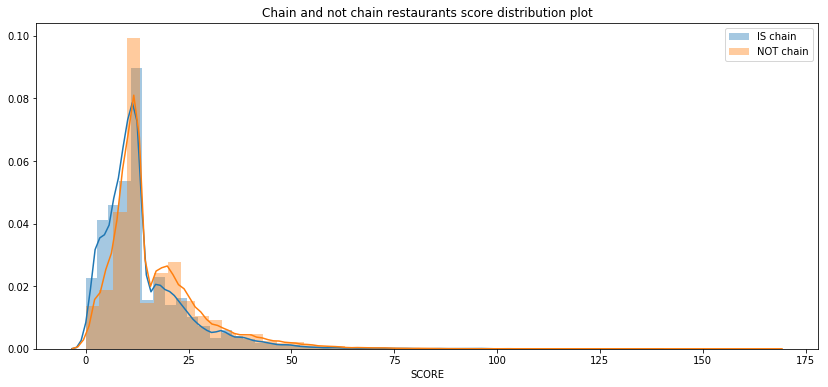

In [32]:
plt.figure(figsize=(14,6))
sns.distplot(df_merged.loc[df_merged['is_chain']==1]['SCORE'],label='IS chain')
sns.distplot(df_merged.loc[df_merged['is_chain']==0]['SCORE'],label='NOT chain')
plt.legend()
plt.title('Chain and not chain restaurants score distribution plot')
plt.show()

In [30]:
from scipy import stats
t_stat, p= stats.ttest_ind(df_merged.loc[df_merged['is_chain']==1]['SCORE'].values,df_merged.loc[df_merged['is_chain']==0]['SCORE'].values,equal_var=False)
print('T-test p-value :',p)

T-test p-value : 1.306083944817936e-184


In [38]:
sorted(df_merged['CUISINE DESCRIPTION'].unique())

['Afghan',
 'African',
 'American',
 'Armenian',
 'Asian',
 'Australian',
 'Bagels/Pretzels',
 'Bakery',
 'Bangladeshi',
 'Barbecue',
 'Basque',
 'Bottled beverages, including water, sodas, juices, etc.',
 'Brazilian',
 'Café/Coffee/Tea',
 'Cajun',
 'Californian',
 'Caribbean',
 'Chicken',
 'Chilean',
 'Chinese',
 'Chinese/Cuban',
 'Chinese/Japanese',
 'Continental',
 'Creole',
 'Creole/Cajun',
 'Czech',
 'Delicatessen',
 'Donuts',
 'Eastern European',
 'Egyptian',
 'English',
 'Ethiopian',
 'Filipino',
 'French',
 'Fruits/Vegetables',
 'German',
 'Greek',
 'Hamburgers',
 'Hawaiian',
 'Hotdogs',
 'Hotdogs/Pretzels',
 'Ice Cream, Gelato, Yogurt, Ices',
 'Indian',
 'Indonesian',
 'Iranian',
 'Irish',
 'Italian',
 'Japanese',
 'Jewish/Kosher',
 'Juice, Smoothies, Fruit Salads',
 'Korean',
 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Moroccan',
 'Not Listed/Not Applicable',
 'Nuts/Confectionary',
 'Other',
 'Pakista

In [40]:
df_merged.groupby('CUISINE DESCRIPTION')['SCORE'].std().sort_index()

CUISINE DESCRIPTION
Afghan                                                      9.120718
African                                                    13.855357
American                                                   10.734016
Armenian                                                   12.861613
Asian                                                      11.330352
Australian                                                 11.714306
Bagels/Pretzels                                            11.817518
Bakery                                                     11.594986
Bangladeshi                                                17.704055
Barbecue                                                   11.855732
Basque                                                      4.242641
Bottled beverages, including water, sodas, juices, etc.     9.116387
Brazilian                                                  12.414868
Café/Coffee/Tea                                             9.728048
Cajun         

In [49]:
cuisine_stats=pd.DataFrame()
cuisine_stats['CUISINE DESCRIPTION']=sorted(df_merged.loc[df_merged['BORO']=='Manhattan']['CUISINE DESCRIPTION'].unique())
cuisine_stats['cuisine score mean']=df_merged.loc[df_merged['BORO']=='Manhattan'].groupby('CUISINE DESCRIPTION')['SCORE'].mean().sort_index().values
cuisine_stats['cuisine score std']=df_merged.loc[df_merged['BORO']=='Manhattan'].groupby('CUISINE DESCRIPTION')['SCORE'].std().sort_index().values
cuisine_stats['cuisine count']=df_merged.loc[df_merged['BORO']=='Manhattan']['CUISINE DESCRIPTION'].value_counts().sort_index().values
cuisine_stats.head()

,CUISINE DESCRIPTION,cuisine score mean,cuisine score std,cuisine count
0,Afghan,14.083333,10.543920,12
1,African,20.181818,11.821635,66
2,American,15.510520,11.191669,7937
3,Armenian,15.324324,16.441908,37
4,Asian,17.968170,11.473329,377


In [ ]:
cuis